In [1]:
import sys, os
p = os.path.abspath('..')
# p = p+r'\config'
sys.path.insert(1, p)

In [2]:
import pandas as pd
import re
import numpy as np
from sklearn import metrics


In [3]:
path = './result'
file_list = os.listdir(path)

In [4]:
def sc_calc_acc_condition_with_temp_with_sc(llm_model, few_shot_n, test_n, q_src_yn, ver, p_ver, sc_num, temp, excel_ver):
    tmp = pd.DataFrame()
    df_eval = pd.DataFrame()
    acc_list = []
    path = './result'
    # ./result/sc_l_result_4_15_Y_30_sys_prompt8_0.01_ver1_0.csv
    file_list = os.listdir(path)
    opt_file = [x for x in file_list if x.startswith(f'sc_{llm_model}_result_{few_shot_n}_{test_n}_{q_src_yn}_{ver}_{p_ver}_{sc_num}_{temp}_{excel_ver}')]
    opt_file = [x for x in opt_file if x.endswith(f'.csv')]

    df = pd.DataFrame()

    
    if len(opt_file)>0 : 
        for f in opt_file:
            tmp = pd.read_csv(f'{path}/{f}', index_col =0)
            tmp = tmp.dropna()

            tmp['gold'] = tmp['answer_encode'].apply(lambda x : re.sub(r'[^012]', '', x))
            tmp['o_result'] = tmp['result'].apply(lambda x : re.sub(r'[^012]', '', x))
            tmp = tmp[tmp['o_result'].isin(['1', '0', '2'])]

            
            gold_df = tmp[['id', 'gold']].drop_duplicates()
            chk_cnt = tmp.groupby(['id', 'o_result']).count().reset_index()[['id', 'o_result', 'question']]
            chk_cnt = chk_cnt.rename(columns = {'question': 'cnt'})
            chk_cnt = chk_cnt[chk_cnt['cnt'] == sc_num]
            chk_cnt = chk_cnt.sort_values(by = ['id', 'cnt'], ascending=[True, False]).groupby(['id']).head(1)
            df_eval = pd.merge(gold_df, chk_cnt, on = ['id'])

            df_eval['equal_yn'] = np.where(df_eval['gold']==df_eval['o_result'], 1, 0)
            acc = (df_eval['equal_yn'].sum()/df_eval.shape[0])*100  
            acc_list.append(acc)
            df = pd.concat([df, df_eval], axis =0)
            
        df['equal_yn'] = np.where(df['gold']==df['o_result'], 1, 0)
        y_true = df['o_result']
        y_pred = df['gold']
        print(metrics.classification_report(y_true, y_pred, digits=3))
        
        acc = (df['equal_yn'].sum()/df.shape[0])*100            
        print(f'{llm_model}_result_{few_shot_n}_{test_n}_{q_src_yn} : ', acc)
        return acc_list


In [ ]:
# Process(target=task, args=('l', 1, 10, 'Y', 10, 'sys_prompt10', 3, 0.01, 'ver5'))
# Process(target=task, args=('l', 2, 10, 'Y', 10, 'sys_prompt10', 3, 0.01, 'ver5'))
# Process(target=task, args=('l', 4, 10, 'Y', 10, 'sys_prompt10', 5, 0.01, 'ver5'))

In [5]:
list_ =         sc_calc_acc_condition_with_temp_with_sc('l', 1, 10, 'Y', 10, 'sys_prompt10', 3,  0.01, 'ver5')
print(list_)

              precision    recall  f1-score   support

           0      0.885     0.767     0.821        30
           1      0.795     0.912     0.849        34
           2      1.000     0.800     0.889         5

    accuracy                          0.841        69
   macro avg      0.893     0.826     0.853        69
weighted avg      0.849     0.841     0.840        69

l_result_1_10_Y :  84.05797101449275
[np.float64(71.42857142857143), np.float64(50.0), np.float64(100.0), np.float64(88.88888888888889), np.float64(60.0), np.float64(100.0), np.float64(100.0), np.float64(88.88888888888889), np.float64(80.0), np.float64(87.5)]


In [6]:
list_ =         sc_calc_acc_condition_with_temp_with_sc('l', 2, 10, 'Y', 10, 'sys_prompt10', 3,  0.01, 'ver5')
print(list_)

              precision    recall  f1-score   support

           0      0.935     0.806     0.866        36
           1      0.769     0.938     0.845        32
           2      1.000     0.714     0.833         7

    accuracy                          0.853        75
   macro avg      0.902     0.819     0.848        75
weighted avg      0.871     0.853     0.854        75

l_result_2_10_Y :  85.33333333333334
[np.float64(88.88888888888889), np.float64(100.0), np.float64(75.0), np.float64(85.71428571428571), np.float64(62.5), np.float64(100.0), np.float64(75.0), np.float64(100.0), np.float64(100.0), np.float64(71.42857142857143)]


In [8]:
list_ =         sc_calc_acc_condition_with_temp_with_sc('l', 4, 10, 'Y', 10, 'sys_prompt10', 5,  0.01, 'ver5')
print(list_)

              precision    recall  f1-score   support

           0      0.963     0.929     0.945        28
           1      0.867     0.963     0.912        27
           2      1.000     0.667     0.800         6

    accuracy                          0.918        61
   macro avg      0.943     0.853     0.886        61
weighted avg      0.924     0.918     0.916        61

l_result_4_10_Y :  91.80327868852459
[np.float64(100.0), np.float64(100.0), np.float64(87.5), np.float64(85.71428571428571), np.float64(100.0), np.float64(100.0), np.float64(90.0), np.float64(80.0), np.float64(100.0), np.float64(66.66666666666666)]


In [5]:
# sc_calc_acc_condition_with_temp_with_sc('l', 4, 15, 'Y', 30, 'sys_prompt8', 5,  0.01, 'ver1')
# # process3 = Process(target=task, args=('l', 4, 15, 'Y', 30, 'sys_prompt8', 3, 0.01, 'ver1'))
list_ =         sc_calc_acc_condition_with_temp_with_sc('l', 4, 30, 'Y', 100, 'sys_prompt8', 5,  0.01, 'ver2')
print(list_)
# 그래프 그려서 넣어두기... 분포....

              precision    recall  f1-score   support

           0      0.779     0.813     0.796       563
           1      0.841     0.877     0.859      1111
           2      0.962     0.714     0.820       280

    accuracy                          0.835      1954
   macro avg      0.861     0.801     0.825      1954
weighted avg      0.840     0.835     0.835      1954

l_result_4_30_Y :  83.52098259979529
[np.float64(78.94736842105263), np.float64(84.0), np.float64(86.66666666666667), np.float64(90.0), np.float64(72.72727272727273), np.float64(81.25), np.float64(85.71428571428571), np.float64(86.66666666666667), np.float64(90.0), np.float64(83.33333333333334), np.float64(82.35294117647058), np.float64(90.0), np.float64(91.30434782608695), np.float64(68.42105263157895), np.float64(72.22222222222221), np.float64(83.33333333333334), np.float64(86.66666666666667), np.float64(100.0), np.float64(90.47619047619048), np.float64(80.0), np.float64(90.47619047619048), np.float64(77.27272

In [6]:
# (target=task, args=('l', 4, 30, 'Y', 100, 'sys_prompt9', 5, 0.01, 'ver3'))
list_ =       sc_calc_acc_condition_with_temp_with_sc('l', 4, 10, 'Y', 10, 'sys_prompt10', 5,  0.01, 'ver4')
print(list_)

              precision    recall  f1-score   support

           0      0.750     0.938     0.833        16
           1      0.861     0.838     0.849        37
           2      0.667     0.333     0.444         6

    accuracy                          0.814        59
   macro avg      0.759     0.703     0.709        59
weighted avg      0.811     0.814     0.804        59

l_result_4_10_Y :  81.35593220338984
[np.float64(80.0), np.float64(66.66666666666666), np.float64(100.0), np.float64(66.66666666666666), np.float64(71.42857142857143), np.float64(100.0), np.float64(100.0), np.float64(71.42857142857143), np.float64(75.0), np.float64(83.33333333333334)]


In [7]:
# (target=task, args=('l', 4, 30, 'Y', 100, 'sys_prompt9', 5, 0.01, 'ver3'))
list_ =     sc_calc_acc_condition_with_temp_with_sc('l', 4, 10, 'Y', 10, 'sys_prompt10', 5,  0.01, 'ver1')
print(list_)

              precision    recall  f1-score   support

           0      0.947     0.857     0.900        21
           1      0.795     0.969     0.873        32
           2      1.000     0.500     0.667        10

    accuracy                          0.857        63
   macro avg      0.914     0.775     0.813        63
weighted avg      0.878     0.857     0.849        63

l_result_4_10_Y :  85.71428571428571
[np.float64(100.0), np.float64(100.0), np.float64(60.0), np.float64(100.0), np.float64(83.33333333333334), np.float64(75.0), np.float64(60.0), np.float64(85.71428571428571), np.float64(71.42857142857143), np.float64(100.0)]


In [8]:
# (target=task, args=('l', 4, 30, 'Y', 100, 'sys_prompt9', 5, 0.01, 'ver3'))
list_ =     sc_calc_acc_condition_with_temp_with_sc('l', 4, 10, 'Y', 10, 'sys_prompt10', 5,  0.01, 'ver5')
print(list_)
print(np.mean(list_))

              precision    recall  f1-score   support

           0      0.963     0.929     0.945        28
           1      0.867     0.963     0.912        27
           2      1.000     0.667     0.800         6

    accuracy                          0.918        61
   macro avg      0.943     0.853     0.886        61
weighted avg      0.924     0.918     0.916        61

l_result_4_10_Y :  91.80327868852459
[np.float64(100.0), np.float64(100.0), np.float64(87.5), np.float64(85.71428571428571), np.float64(100.0), np.float64(100.0), np.float64(90.0), np.float64(80.0), np.float64(100.0), np.float64(66.66666666666666)]
90.98809523809524


In [9]:
# (target=task, args=('l', 4, 30, 'Y', 100, 'sys_prompt9', 5, 0.01, 'ver3'))
list_ =    sc_calc_acc_condition_with_temp_with_sc('l', 4, 10, 'Y', 10, 'sys_prompt10', 5,  0.01, 'ver1') 
print(list_)

              precision    recall  f1-score   support

           0      0.947     0.857     0.900        21
           1      0.795     0.969     0.873        32
           2      1.000     0.500     0.667        10

    accuracy                          0.857        63
   macro avg      0.914     0.775     0.813        63
weighted avg      0.878     0.857     0.849        63

l_result_4_10_Y :  85.71428571428571
[np.float64(100.0), np.float64(100.0), np.float64(60.0), np.float64(100.0), np.float64(83.33333333333334), np.float64(75.0), np.float64(60.0), np.float64(85.71428571428571), np.float64(71.42857142857143), np.float64(100.0)]


In [10]:
np.mean(list_)

np.float64(83.54761904761905)

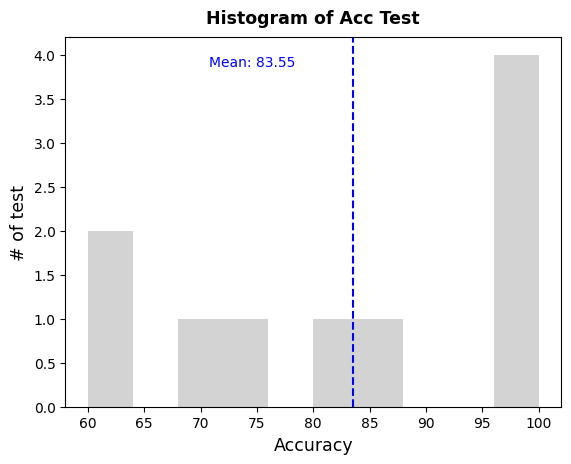

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.hist(list_
    ,  color = 'lightgray'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Histogram of Acc Test", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Accuracy", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("# of test", # add y-axis label
              fontsize = 12.5)

ax.axvline(np.mean(list_), # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)
fig.text(0.35, 0.82, color = 'blue', fontsize = 10,  s='Mean: ' + str(round(np.mean(list_), 2))) #


plt.show();


In [12]:
# def calc_acc_condition(llm_model, few_shot_n, test_n, q_src_yn, p_ver):
#     opt_file = [x for x in file_list if x.startswith(f'{llm_model}_result_{few_shot_n}_{test_n}_{q_src_yn}')]
#     opt_file = [x for x in opt_file if x.endswith(f'_{p_ver}.csv')]

#     if len(opt_file)>0 : 
#         df = pd.DataFrame()

#         for f in opt_file:
#             tmp = pd.read_csv(f'./result/{f}', index_col =0)
#             df = pd.concat([df, tmp], axis =0)
        
#         df['gold'] = df['answer_encode'].apply(lambda x : re.sub(r'[^0-9]', '', x))
#         df['o_result'] = df['result'].apply(lambda x : re.sub(r'[^0-9]', '', x))
#         df['equal_yn'] = np.where(df['gold']==df['o_result'], 1, 0)
#         acc = (df['equal_yn'].sum()/df.shape[0])*100
#         print(f'{llm_model}_result_{few_shot_n}_{test_n}_{q_src_yn} : ', acc)


In [13]:
def calc_acc_condition(llm_model, few_shot_n, test_n, q_src_yn, p_ver):
    opt_file = [x for x in file_list if x.startswith(f'{llm_model}_result_{few_shot_n}_{test_n}_{q_src_yn}')]
    opt_file = [x for x in opt_file if x.endswith(f'_{p_ver}.csv')]

    if len(opt_file)>0 : 
        df = pd.DataFrame()

        for f in opt_file:
            tmp = pd.read_csv(f'./result/{f}', index_col =0)
            tmp['gold'] = tmp['answer_encode'].apply(lambda x : re.sub(r'[^0-9]', '', x))
            tmp['o_result'] = tmp['result'].apply(lambda x : re.sub(r'[^0-9]', '', x))
            tmp[['gold', 'o_result']] = tmp[['gold', 'o_result']].astype(int)
            df_eval = tmp.groupby('id').mean('o_result').reset_index()
            df_eval['o_result'] = df_eval['o_result'].round(0)
            df = pd.concat([df, tmp], axis =0)
            
        df['equal_yn'] = np.where(df['gold']==df['o_result'], 1, 0)
        acc = (df['equal_yn'].sum()/df.shape[0])*100            
        print(f'{llm_model}_result_{few_shot_n}_{test_n}_{q_src_yn} : ', acc)


In [14]:
calc_acc_condition('c' , 2, 10, 'N', 'sys_prompt1')
calc_acc_condition('c' , 2, 10, 'Y', 'sys_prompt1')
calc_acc_condition('c' , 3, 10, 'N', 'sys_prompt1')
calc_acc_condition('c' , 3, 10, 'Y', 'sys_prompt1')


calc_acc_condition('l' , 1, 10, 'Y', 'sys_prompt1')
calc_acc_condition('l' , 2, 10, 'Y', 'sys_prompt1')
calc_acc_condition('l' , 3, 10, 'Y', 'sys_prompt1')
calc_acc_condition('l' , 4, 10, 'Y', 'sys_prompt1')

calc_acc_condition('l' , 1, 10, 'N', 'sys_prompt1')
calc_acc_condition('l' , 2, 10, 'N', 'sys_prompt1')
calc_acc_condition('l' , 3, 10, 'N', 'sys_prompt1')
calc_acc_condition('l' , 4, 10, 'N', 'sys_prompt1')


l_result_1_10_Y :  66.0
l_result_2_10_Y :  56.00000000000001
l_result_3_10_Y :  56.00000000000001
l_result_1_10_N :  59.0
l_result_2_10_N :  59.0
l_result_3_10_N :  51.0


In [15]:
calc_acc_condition('c' , 2, 10, 'N', 'sys_prompt2')
calc_acc_condition('c' , 2, 10, 'Y', 'sys_prompt2')
calc_acc_condition('c' , 3, 10, 'N', 'sys_prompt2')
calc_acc_condition('c' , 3, 10, 'Y', 'sys_prompt2')

calc_acc_condition('l' , 1, 10, 'Y', 'sys_prompt2')
calc_acc_condition('l' , 2, 10, 'Y', 'sys_prompt2')
calc_acc_condition('l' , 3, 10, 'Y', 'sys_prompt2')
calc_acc_condition('l' , 4, 10, 'Y', 'sys_prompt2')


calc_acc_condition('l' , 1, 10, 'N', 'sys_prompt2')
calc_acc_condition('l' , 2, 10, 'N', 'sys_prompt2')
calc_acc_condition('l' , 3, 10, 'N', 'sys_prompt2')
calc_acc_condition('l' , 4, 10, 'N', 'sys_prompt2')


l_result_1_10_Y :  60.0
l_result_2_10_Y :  68.0
l_result_3_10_Y :  69.0
l_result_1_10_N :  64.0
l_result_2_10_N :  63.0
l_result_3_10_N :  64.0


In [16]:
calc_acc_condition('c' , 2, 10, 'N', 'sys_prompt3')
calc_acc_condition('c' , 2, 10, 'Y', 'sys_prompt3')
calc_acc_condition('c' , 3, 10, 'N', 'sys_prompt3')
calc_acc_condition('c' , 3, 10, 'Y', 'sys_prompt3')

calc_acc_condition('l' , 1, 10, 'Y', 'sys_prompt3')
calc_acc_condition('l' , 2, 10, 'Y', 'sys_prompt3')
calc_acc_condition('l' , 3, 10, 'Y', 'sys_prompt3')
calc_acc_condition('l' , 4, 10, 'Y', 'sys_prompt3')


calc_acc_condition('l' , 1, 10, 'N', 'sys_prompt3')
calc_acc_condition('l' , 2, 10, 'N', 'sys_prompt3')
calc_acc_condition('l' , 3, 10, 'N', 'sys_prompt3')
calc_acc_condition('l' , 4, 10, 'N', 'sys_prompt3')


l_result_1_10_Y :  64.0
l_result_2_10_Y :  60.0
l_result_3_10_Y :  64.0
l_result_1_10_N :  60.0
l_result_2_10_N :  60.0
l_result_3_10_N :  63.0


In [17]:
calc_acc_condition('c' , 2, 10, 'N', 'sys_prompt4')
calc_acc_condition('c' , 2, 10, 'Y', 'sys_prompt4')
calc_acc_condition('c' , 3, 10, 'N', 'sys_prompt4')
calc_acc_condition('c' , 3, 10, 'Y', 'sys_prompt4')

calc_acc_condition('l' , 1, 10, 'Y', 'sys_prompt4')
calc_acc_condition('l' , 2, 10, 'Y', 'sys_prompt4')
calc_acc_condition('l' , 3, 10, 'Y', 'sys_prompt4')
calc_acc_condition('l' , 4, 10, 'Y', 'sys_prompt4')


calc_acc_condition('l' , 1, 10, 'N', 'sys_prompt4')
calc_acc_condition('l' , 2, 10, 'N', 'sys_prompt4')
calc_acc_condition('l' , 3, 10, 'N', 'sys_prompt4')
calc_acc_condition('l' , 4, 10, 'N', 'sys_prompt4')


l_result_1_10_Y :  61.0
l_result_2_10_Y :  65.0
l_result_3_10_Y :  67.0
l_result_1_10_N :  65.0
l_result_2_10_N :  70.0
l_result_3_10_N :  66.0


In [18]:
def sc_calc_acc_condition(llm_model, few_shot_n, test_n, q_src_yn, p_ver):
    opt_file = [x for x in file_list if x.startswith(f'sc_{llm_model}_result_{few_shot_n}_{test_n}_{q_src_yn}')]
    opt_file = [x for x in opt_file if x.endswith(f'_{p_ver}.csv')]
    df = pd.DataFrame()
    if len(opt_file)>0 : 
        print(opt_file)
        for f in opt_file:
            tmp = pd.read_csv(f'./result/{f}', index_col =0)
            tmp['gold'] = tmp['answer_encode'].apply(lambda x : re.sub(r'[^0-9]', '', x))
            tmp['o_result'] = tmp['result'].apply(lambda x : re.sub(r'[^0-9]', '', x))
            tmp[['gold', 'o_result']] = tmp[['gold', 'o_result']].astype(int)
            df_eval = tmp.groupby('id').mean('o_result').reset_index()
            df_eval['o_result'] = df_eval['o_result'].round(0)
            df_eval['equal_yn'] = np.where(df_eval['gold']==df_eval['o_result'], 1, 0)
            acc = (df_eval['equal_yn'].sum()/df_eval.shape[0])*100  
            # print(acc)
            df = pd.concat([df, df_eval], axis =0)
            
        df['equal_yn'] = np.where(df['gold']==df['o_result'], 1, 0)
        acc = (df['equal_yn'].sum()/df.shape[0])*100            
        print(f'{llm_model}_result_{few_shot_n}_{test_n}_{q_src_yn} : ', acc)


In [19]:
sc_calc_acc_condition('l' , 1, 10, 'Y', 'sys_prompt4')
sc_calc_acc_condition('l' , 2, 10, 'Y', 'sys_prompt4') # temperature 0.2
sc_calc_acc_condition('l' , 3, 10, 'Y', 'sys_prompt4')

sc_calc_acc_condition('l' , 1, 10, 'N', 'sys_prompt4')
sc_calc_acc_condition('l' , 2, 10, 'N', 'sys_prompt4')
sc_calc_acc_condition('l' , 3, 10, 'N', 'sys_prompt4')

['sc_l_result_1_10_Y_2_sys_prompt4.csv', 'sc_l_result_1_10_Y_3_sys_prompt4.csv', 'sc_l_result_1_10_Y_4_sys_prompt4.csv', 'sc_l_result_1_10_Y_0_sys_prompt4.csv', 'sc_l_result_1_10_Y_1_sys_prompt4.csv']
l_result_1_10_Y :  66.0
['sc_l_result_2_10_Y_16_sys_prompt4.csv', 'sc_l_result_2_10_Y_4_sys_prompt4.csv', 'sc_l_result_2_10_Y_6_sys_prompt4.csv', 'sc_l_result_2_10_Y_1_sys_prompt4.csv', 'sc_l_result_2_10_Y_2_sys_prompt4.csv', 'sc_l_result_2_10_Y_14_sys_prompt4.csv', 'sc_l_result_2_10_Y_17_sys_prompt4.csv', 'sc_l_result_2_10_Y_15_sys_prompt4.csv', 'sc_l_result_2_10_Y_3_sys_prompt4.csv', 'sc_l_result_2_10_Y_0_sys_prompt4.csv', 'sc_l_result_2_10_Y_7_sys_prompt4.csv', 'sc_l_result_2_10_Y_19_sys_prompt4.csv', 'sc_l_result_2_10_Y_5_sys_prompt4.csv', 'sc_l_result_2_10_Y_8_sys_prompt4.csv', 'sc_l_result_2_10_Y_13_sys_prompt4.csv', 'sc_l_result_2_10_Y_9_sys_prompt4.csv', 'sc_l_result_2_10_Y_11_sys_prompt4.csv', 'sc_l_result_2_10_Y_10_sys_prompt4.csv', 'sc_l_result_2_10_Y_18_sys_prompt4.csv', 'sc_l

In [20]:
sc_calc_acc_condition('l' , 1, 5, 'Y', 'sys_prompt4')
sc_calc_acc_condition('l' , 2, 5, 'Y', 'sys_prompt4')
sc_calc_acc_condition('l' , 3, 5, 'Y', 'sys_prompt4')

# sc_l_result_1_10_Y_0_sys_prompt4.csv
# (f'./result/sc_{llm_model}_result_{few_shot_n}_{self.test_n}_{q_src_yn}_{self.version}_{self.p_ver}.csv')

sc_calc_acc_condition('l' , 1, 5, 'N', 'sys_prompt4')
sc_calc_acc_condition('l' , 2, 5, 'N', 'sys_prompt4')
sc_calc_acc_condition('l' , 3, 5, 'N', 'sys_prompt4')


['sc_l_result_1_5_Y_5_sys_prompt4.csv', 'sc_l_result_1_5_Y_8_sys_prompt4.csv', 'sc_l_result_1_5_Y_9_sys_prompt4.csv', 'sc_l_result_1_5_Y_6_sys_prompt4.csv', 'sc_l_result_1_5_Y_4_sys_prompt4.csv', 'sc_l_result_1_5_Y_2_sys_prompt4.csv', 'sc_l_result_1_5_Y_7_sys_prompt4.csv', 'sc_l_result_1_5_Y_1_sys_prompt4.csv', 'sc_l_result_1_5_Y_0_sys_prompt4.csv', 'sc_l_result_1_5_Y_3_sys_prompt4.csv']
l_result_1_5_Y :  72.0
['sc_l_result_2_5_Y_5_sys_prompt4.csv', 'sc_l_result_2_5_Y_6_sys_prompt4.csv', 'sc_l_result_2_5_Y_3_sys_prompt4.csv', 'sc_l_result_2_5_Y_1_sys_prompt4.csv', 'sc_l_result_2_5_Y_4_sys_prompt4.csv', 'sc_l_result_2_5_Y_2_sys_prompt4.csv', 'sc_l_result_2_5_Y_0_sys_prompt4.csv']
l_result_2_5_Y :  82.85714285714286
['sc_l_result_3_5_Y_3_sys_prompt4.csv', 'sc_l_result_3_5_Y_6_sys_prompt4.csv', 'sc_l_result_3_5_Y_4_sys_prompt4.csv', 'sc_l_result_3_5_Y_5_sys_prompt4.csv', 'sc_l_result_3_5_Y_0_sys_prompt4.csv', 'sc_l_result_3_5_Y_2_sys_prompt4.csv', 'sc_l_result_3_5_Y_1_sys_prompt4.csv']
l_

In [21]:

sc_calc_acc_condition('l' , 2, 5, 'Y', 'sys_prompt5')
sc_calc_acc_condition('l' , 2, 5, 'N', 'sys_prompt5')


['sc_l_result_2_5_Y_2_sys_prompt5.csv', 'sc_l_result_2_5_Y_4_sys_prompt5.csv', 'sc_l_result_2_5_Y_3_sys_prompt5.csv', 'sc_l_result_2_5_Y_0_sys_prompt5.csv', 'sc_l_result_2_5_Y_1_sys_prompt5.csv']
l_result_2_5_Y :  52.0
['sc_l_result_2_5_N_0_sys_prompt5.csv', 'sc_l_result_2_5_N_4_sys_prompt5.csv', 'sc_l_result_2_5_N_3_sys_prompt5.csv', 'sc_l_result_2_5_N_2_sys_prompt5.csv', 'sc_l_result_2_5_N_1_sys_prompt5.csv']
l_result_2_5_N :  48.0


In [22]:

sc_calc_acc_condition('c' , 2, 10, 'Y', 'sys_prompt4')
sc_calc_acc_condition('c' , 2, 10, 'N', 'sys_prompt4')


['sc_c_result_2_10_Y_2_sys_prompt4.csv', 'sc_c_result_2_10_Y_7_sys_prompt4.csv', 'sc_c_result_2_10_Y_8_sys_prompt4.csv', 'sc_c_result_2_10_Y_4_sys_prompt4.csv', 'sc_c_result_2_10_Y_6_sys_prompt4.csv', 'sc_c_result_2_10_Y_9_sys_prompt4.csv', 'sc_c_result_2_10_Y_5_sys_prompt4.csv', 'sc_c_result_2_10_Y_3_sys_prompt4.csv', 'sc_c_result_2_10_Y_1_sys_prompt4.csv', 'sc_c_result_2_10_Y_0_sys_prompt4.csv']
c_result_2_10_Y :  56.00000000000001


In [23]:
sc_calc_acc_condition('c' , 2, 10, 'Y', 'sys_prompt7')
sc_calc_acc_condition('c' , 2, 10, 'N', 'sys_prompt7')


['sc_c_result_2_10_Y_4_sys_prompt7.csv', 'sc_c_result_2_10_Y_0_sys_prompt7.csv', 'sc_c_result_2_10_Y_3_sys_prompt7.csv', 'sc_c_result_2_10_Y_1_sys_prompt7.csv', 'sc_c_result_2_10_Y_5_sys_prompt7.csv', 'sc_c_result_2_10_Y_2_sys_prompt7.csv']
c_result_2_10_Y :  56.666666666666664


In [24]:

sc_calc_acc_condition('l' , 2, 10, 'Y', 'sys_prompt7')
sc_calc_acc_condition('l' , 2, 10, 'N', 'sys_prompt7')


['sc_l_result_2_10_Y_1_sys_prompt7.csv', 'sc_l_result_2_10_Y_6_sys_prompt7.csv', 'sc_l_result_2_10_Y_0_sys_prompt7.csv', 'sc_l_result_2_10_Y_7_sys_prompt7.csv', 'sc_l_result_2_10_Y_8_sys_prompt7.csv', 'sc_l_result_2_10_Y_5_sys_prompt7.csv', 'sc_l_result_2_10_Y_9_sys_prompt7.csv', 'sc_l_result_2_10_Y_2_sys_prompt7.csv', 'sc_l_result_2_10_Y_4_sys_prompt7.csv', 'sc_l_result_2_10_Y_3_sys_prompt7.csv']
l_result_2_10_Y :  60.0


In [25]:

sc_calc_acc_condition('l' , 4, 10, 'Y', 'sys_prompt7')
sc_calc_acc_condition('l' , 4, 10, 'N', 'sys_prompt7')


['sc_l_result_4_10_Y_1_sys_prompt7.csv', 'sc_l_result_4_10_Y_8_sys_prompt7.csv', 'sc_l_result_4_10_Y_9_sys_prompt7.csv', 'sc_l_result_4_10_Y_0_sys_prompt7.csv', 'sc_l_result_4_10_Y_6_sys_prompt7.csv', 'sc_l_result_4_10_Y_7_sys_prompt7.csv', 'sc_l_result_4_10_Y_3_sys_prompt7.csv', 'sc_l_result_4_10_Y_2_sys_prompt7.csv', 'sc_l_result_4_10_Y_5_sys_prompt7.csv', 'sc_l_result_4_10_Y_4_sys_prompt7.csv']
l_result_4_10_Y :  69.0


In [26]:
def sc_calc_acc_condition_with_temp(llm_model, few_shot_n, test_n, q_src_yn, p_ver, temp):
    opt_file = [x for x in file_list if x.startswith(f'sc_{llm_model}_result_{few_shot_n}_{test_n}_{q_src_yn}')]
    opt_file = [x for x in opt_file if x.endswith(f'_{p_ver}_{temp}.csv')]
    df = pd.DataFrame()
    if len(opt_file)>0 : 
        for f in opt_file:
            print(f)
            tmp = pd.read_csv(f'./result/{f}', index_col =0)
            tmp['gold'] = tmp['answer_encode'].apply(lambda x : re.sub(r'[^0-9]', '', x))
            tmp['o_result'] = tmp['result'].apply(lambda x : re.sub(r'[^0-9]', '', x))
            tmp[['gold', 'o_result']] = tmp[['gold', 'o_result']].astype(int)
            df_eval = tmp.groupby('id').mean('o_result').reset_index()
            df_eval['o_result'] = df_eval['o_result'].round(0)
            df_eval['equal_yn'] = np.where(df_eval['gold']==df_eval['o_result'], 1, 0)
            acc = (df_eval['equal_yn'].sum()/df_eval.shape[0])*100  
            print(acc)
            df = pd.concat([df, df_eval], axis =0)
            
        df['equal_yn'] = np.where(df['gold']==df['o_result'], 1, 0)
        acc = (df['equal_yn'].sum()/df.shape[0])*100            
        print(f'{llm_model}_result_{few_shot_n}_{test_n}_{q_src_yn} : ', acc)


In [27]:
sc_calc_acc_condition_with_temp('l', 2, 10, 'Y','sys_prompt4', 0)

sc_l_result_2_10_Y_14_sys_prompt4_0.csv
70.0
sc_l_result_2_10_Y_6_sys_prompt4_0.csv
60.0
sc_l_result_2_10_Y_2_sys_prompt4_0.csv
60.0
sc_l_result_2_10_Y_17_sys_prompt4_0.csv
50.0
sc_l_result_2_10_Y_12_sys_prompt4_0.csv
70.0
sc_l_result_2_10_Y_5_sys_prompt4_0.csv
60.0
sc_l_result_2_10_Y_4_sys_prompt4_0.csv
70.0
sc_l_result_2_10_Y_0_sys_prompt4_0.csv
90.0
sc_l_result_2_10_Y_8_sys_prompt4_0.csv
70.0
sc_l_result_2_10_Y_10_sys_prompt4_0.csv
60.0
sc_l_result_2_10_Y_15_sys_prompt4_0.csv
60.0
sc_l_result_2_10_Y_9_sys_prompt4_0.csv
70.0
sc_l_result_2_10_Y_13_sys_prompt4_0.csv
60.0
sc_l_result_2_10_Y_3_sys_prompt4_0.csv
50.0
sc_l_result_2_10_Y_11_sys_prompt4_0.csv
60.0
sc_l_result_2_10_Y_19_sys_prompt4_0.csv
70.0
sc_l_result_2_10_Y_16_sys_prompt4_0.csv
70.0
sc_l_result_2_10_Y_7_sys_prompt4_0.csv
80.0
sc_l_result_2_10_Y_18_sys_prompt4_0.csv
50.0
sc_l_result_2_10_Y_1_sys_prompt4_0.csv
60.0
l_result_2_10_Y :  64.5


In [28]:
llm_model, few_shot_n,test_n, q_src_yn, p_ver, temp = 'l',2, 10, 'Y','sys_prompt4', 0
opt_file = [x for x in file_list if x.startswith(f'sc_{llm_model}_result_{few_shot_n}_{test_n}_{q_src_yn}')]
opt_file = [x for x in opt_file if x.endswith(f'_{p_ver}_{temp}.csv')]
df = pd.DataFrame()
if len(opt_file)>0 : 
    for f in opt_file:
        print(f)
        tmp = pd.read_csv(f'./result/{f}', index_col =0)
        tmp['gold'] = tmp['answer_encode'].apply(lambda x : re.sub(r'[^0-9]', '', x))
        tmp['o_result'] = tmp['result'].apply(lambda x : re.sub(r'[^0-9]', '', x))
        tmp[['gold', 'o_result']] = tmp[['gold', 'o_result']].astype(int)
        tmp['equal_yn'] = np.where(tmp['gold']==tmp['o_result'], 1, 0)
        acc = (tmp['equal_yn'].sum()/tmp.shape[0])*100  
        df = pd.concat([df, tmp], axis =0)

df.to_csv('youcandoit.csv')

sc_l_result_2_10_Y_14_sys_prompt4_0.csv
sc_l_result_2_10_Y_6_sys_prompt4_0.csv
sc_l_result_2_10_Y_2_sys_prompt4_0.csv
sc_l_result_2_10_Y_17_sys_prompt4_0.csv
sc_l_result_2_10_Y_12_sys_prompt4_0.csv
sc_l_result_2_10_Y_5_sys_prompt4_0.csv
sc_l_result_2_10_Y_4_sys_prompt4_0.csv
sc_l_result_2_10_Y_0_sys_prompt4_0.csv
sc_l_result_2_10_Y_8_sys_prompt4_0.csv
sc_l_result_2_10_Y_10_sys_prompt4_0.csv
sc_l_result_2_10_Y_15_sys_prompt4_0.csv
sc_l_result_2_10_Y_9_sys_prompt4_0.csv
sc_l_result_2_10_Y_13_sys_prompt4_0.csv
sc_l_result_2_10_Y_3_sys_prompt4_0.csv
sc_l_result_2_10_Y_11_sys_prompt4_0.csv
sc_l_result_2_10_Y_19_sys_prompt4_0.csv
sc_l_result_2_10_Y_16_sys_prompt4_0.csv
sc_l_result_2_10_Y_7_sys_prompt4_0.csv
sc_l_result_2_10_Y_18_sys_prompt4_0.csv
sc_l_result_2_10_Y_1_sys_prompt4_0.csv


In [29]:
sc_calc_acc_condition_with_temp('l', 2, 10, 'Y','sys_prompt4', 0.5)

sc_l_result_2_10_Y_3_sys_prompt4_0.5.csv
40.0
sc_l_result_2_10_Y_4_sys_prompt4_0.5.csv
60.0
sc_l_result_2_10_Y_2_sys_prompt4_0.5.csv
70.0
sc_l_result_2_10_Y_1_sys_prompt4_0.5.csv
70.0
sc_l_result_2_10_Y_0_sys_prompt4_0.5.csv
50.0
l_result_2_10_Y :  57.99999999999999
